<a href="https://colab.research.google.com/github/ak224001/Deep-Learning/blob/master/cats_vs_dogs_Image_classifier_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [5]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c dogs-vs-cats

 98% 266M/271M [00:03<00:00, 96.3MB/s]
100% 271M/271M [00:03<00:00, 91.1MB/s]
 99% 540M/543M [00:06<00:00, 93.4MB/s]
100% 543M/543M [00:06<00:00, 88.5MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 95.4MB/s]


In [10]:
!unzip train.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [11]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

In [0]:
import os
TRAIN_DIR = "/content/train/"
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [13]:
cat_files = [fn for fn in train_images if 'cat' in fn]
dog_files = [fn for fn in train_images if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [0]:
import numpy as np
#validation set with 3000 images
cat_validate = np.random.choice(cat_files, size = 2500 ,replace = False )
dog_validate = np.random.choice(dog_files, size = 2500 ,replace = False )

In [0]:
#train set
cat_train = list(set(cat_files) - set(cat_validate))
dog_train = list(set(dog_files) - set(dog_validate))

In [16]:
print('Cat datasets:', len(cat_train), len(cat_validate))
print('Dog datasets:', len(dog_train), len(dog_validate))

Cat datasets: 10000 2500
Dog datasets: 10000 2500


In [0]:
#make files
train_dir = "training_data"
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None

In [18]:
import os
dataset_home = '/content/training_data/'
subdirs = ['dogs/', 'cats/']
for subdir in subdirs:
  newdir = dataset_home+subdir
  print(newdir)
  os.mkdir(newdir) if not os.path.isdir(newdir) else None

/content/training_data/dogs/
/content/training_data/cats/


In [0]:
import shutil
for fn in cat_train:
    shutil.copy(fn, "/content/training_data/cats")
for fn in dog_train:
    shutil.copy(fn, "/content/training_data/dogs")

In [0]:
#make files
validation_dir = "validation_data"
os.mkdir(validation_dir) if not os.path.isdir(validation_dir) else None

In [21]:
import os
dataset_home = '/content/validation_data/'
subdirs = ['dogs/', 'cats/']
for subdir in subdirs:
  newdir = dataset_home+subdir
  print(newdir)
  os.mkdir(newdir) if not os.path.isdir(newdir) else None

/content/validation_data/dogs/
/content/validation_data/cats/


In [0]:
#!rm -rf validation_data

In [0]:
import shutil
for fn in cat_validate:
    shutil.copy(fn, "/content/validation_data/cats")
for fn in dog_validate:
    shutil.copy(fn, "/content/validation_data/dogs")

In [0]:
#make files
test_dir = "test_data"
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

In [25]:
import os
dataset_home = '/content/test_data/'
subdirs = ['dogs_and_cats/']
for subdir in subdirs:
  newdir = dataset_home+subdir
  print(newdir)
  os.mkdir(newdir) if not os.path.isdir(newdir) else None

/content/test_data/dogs_and_cats/


In [0]:
import os
TEST_DIR = "/content/test1/"
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]
import shutil
for fn in test_images:
    shutil.copy(fn, "/content/test_data/dogs_and_cats")

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
training_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [28]:
# prepare iterators
train_it = training_data_gen.flow_from_directory("/content/training_data",
class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_data_gen.flow_from_directory("/content/test_data",
class_mode='binary', batch_size=64, target_size=(200, 200))
validate_it = validation_data_gen.flow_from_directory("/content/validation_data",
class_mode='binary', batch_size=64, target_size=(200, 200))

Found 20000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
Found 5000 images belonging to 2 classes.


In [0]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))
    
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       7

In [32]:
import tensorflow as tf

tf.test.is_gpu_available(cuda_only=True)

True

In [33]:
tf.__version__

'2.2.0-rc1'

In [34]:
batch_size = 30
epochs = 50
import os
# Train the model with the new callback
history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=validate_it, validation_steps=len(validate_it), epochs=50, verbose=1)

Epoch 1/50
313/313 [==============================] - 211s 673ms/step - loss: 0.6889 - accuracy: 0.5323 - val_loss: 0.7150 - val_accuracy: 0.5240
Epoch 2/50
313/313 [==============================] - 210s 670ms/step - loss: 0.6585 - accuracy: 0.6102 - val_loss: 0.6395 - val_accuracy: 0.6246
Epoch 3/50
313/313 [==============================] - 209s 668ms/step - loss: 0.6333 - accuracy: 0.6432 - val_loss: 0.6556 - val_accuracy: 0.6030
Epoch 4/50
313/313 [==============================] - 209s 667ms/step - loss: 0.6030 - accuracy: 0.6743 - val_loss: 0.5555 - val_accuracy: 0.7126
Epoch 5/50
313/313 [==============================] - 209s 667ms/step - loss: 0.5828 - accuracy: 0.6952 - val_loss: 0.5954 - val_accuracy: 0.6628
Epoch 6/50
313/313 [==============================] - 208s 666ms/step - loss: 0.5674 - accuracy: 0.7038 - val_loss: 0.5219 - val_accuracy: 0.7528
Epoch 7/50
313/313 [==============================] - 208s 666ms/step - loss: 0.5494 - accuracy: 0.7198 - val_loss: 0.4984 -

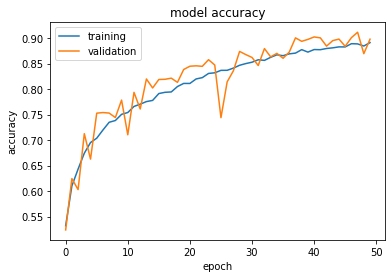

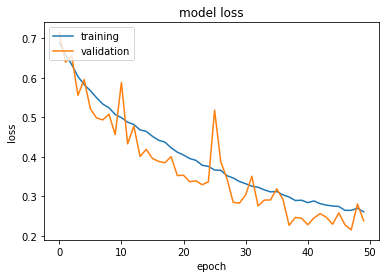

In [37]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_data_dir  = "/content/test_data"
probabilities = model.predict(test_it, 30)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_it.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% dog")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
    plt.show()

In [0]:
for index in range(5):
  train_it.filenames[index]